CODE BLOCK: 1

In [1]:
# !pip install torchsummary

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from lib.models import Model2
from lib.utils import model_summary
from lib.utils import train, test

CODE BLOCK: 2

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [4]:
SEED = 1
torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

CODE BLOCK: 3

In [5]:
# simple transform
simple_transforms = transforms.Compose([
                                     transforms.ToTensor(), 
                                      ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

C:\Users\abhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [7]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [8]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

CODE BLOCK: 6

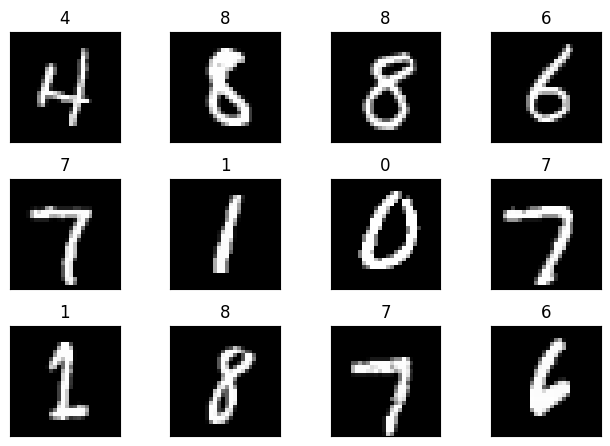

In [9]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [10]:
model_summary(Model2())


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,080
       BatchNorm2d-6           [-1, 12, 24, 24]              24
              ReLU-7           [-1, 12, 24, 24]               0
           Dropout-8           [-1, 12, 24, 24]               0
            Conv2d-9           [-1, 14, 22, 22]           1,512
      BatchNorm2d-10           [-1, 14, 22, 22]              28
             ReLU-11           [-1, 14, 22, 22]               0
          Dropout-12           [-1, 14, 22, 22]               0
        MaxPool2d-13           [-1, 14, 11, 11]               0
           Conv2d-14           [-1, 10,

CODE BLOCK: 8

In [11]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
model = Model2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

C:\Users\abhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.1651 Batch_id=468 Accuracy=81.98: 100%|██████████| 469/469 [00:58<00:00,  8.03it/s]


Test set: Average loss: 0.1011, Accuracy: 9770/10000 (97.70%)

Epoch 2


Train: Loss=0.0517 Batch_id=468 Accuracy=97.23: 100%|██████████| 469/469 [00:32<00:00, 14.49it/s]


Test set: Average loss: 0.0587, Accuracy: 9841/10000 (98.41%)

Epoch 3


Train: Loss=0.0572 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:28<00:00, 16.46it/s]


Test set: Average loss: 0.0462, Accuracy: 9863/10000 (98.63%)

Epoch 4


Train: Loss=0.0764 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:16<00:00, 27.86it/s]


Test set: Average loss: 0.0430, Accuracy: 9879/10000 (98.79%)

Epoch 5


Train: Loss=0.0276 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:26<00:00, 17.79it/s]


Test set: Average loss: 0.0341, Accuracy: 9904/10000 (99.04%)

Epoch 6


Train: Loss=0.0394 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:22<00:00, 20.73it/s]


Test set: Average loss: 0.0335, Accuracy: 9904/10000 (99.04%)

Epoch 7


Train: Loss=0.0187 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:28<00:00, 16.52it/s]


Test set: Average loss: 0.0298, Accuracy: 9912/10000 (99.12%)

Epoch 8


Train: Loss=0.0398 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:21<00:00, 21.60it/s]


Test set: Average loss: 0.0278, Accuracy: 9918/10000 (99.18%)

Epoch 9


Train: Loss=0.1033 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:19<00:00, 23.97it/s]


Test set: Average loss: 0.0319, Accuracy: 9907/10000 (99.07%)

Epoch 10


Train: Loss=0.0431 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]


Test set: Average loss: 0.0271, Accuracy: 9923/10000 (99.23%)

Epoch 11


Train: Loss=0.0450 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]


Test set: Average loss: 0.0256, Accuracy: 9921/10000 (99.21%)

Epoch 12


Train: Loss=0.0035 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:21<00:00, 21.36it/s]


Test set: Average loss: 0.0281, Accuracy: 9918/10000 (99.18%)

Epoch 13


Train: Loss=0.0477 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:15<00:00, 30.19it/s]


Test set: Average loss: 0.0252, Accuracy: 9924/10000 (99.24%)

Epoch 14


Train: Loss=0.0166 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:15<00:00, 30.82it/s]


Test set: Average loss: 0.0250, Accuracy: 9930/10000 (99.30%)

Epoch 15


Train: Loss=0.0162 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:15<00:00, 29.75it/s]


Test set: Average loss: 0.0253, Accuracy: 9927/10000 (99.27%)

Epoch 16


Train: Loss=0.0422 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:21<00:00, 21.52it/s]


Test set: Average loss: 0.0245, Accuracy: 9924/10000 (99.24%)

Epoch 17


Train: Loss=0.0078 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:25<00:00, 18.36it/s]


Test set: Average loss: 0.0233, Accuracy: 9923/10000 (99.23%)

Epoch 18


Train: Loss=0.0197 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:42<00:00, 11.12it/s]


Test set: Average loss: 0.0231, Accuracy: 9929/10000 (99.29%)

Epoch 19


Train: Loss=0.0193 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [01:14<00:00,  6.33it/s]


Test set: Average loss: 0.0211, Accuracy: 9932/10000 (99.32%)

Epoch 20


Train: Loss=0.0448 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [01:01<00:00,  7.62it/s]


Test set: Average loss: 0.0238, Accuracy: 9922/10000 (99.22%)



CODE BLOCK: 9

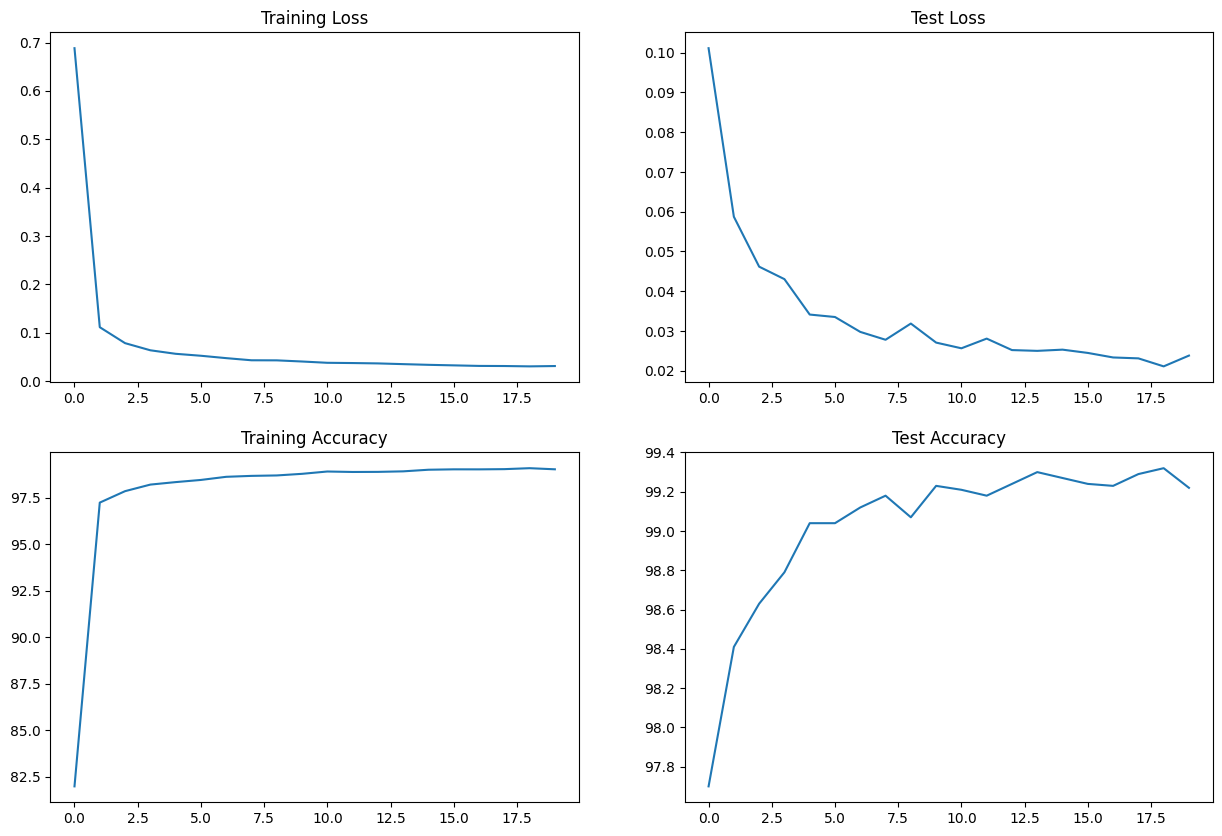

In [12]:
from lib.utils import plot_training
plot_training()

In [13]:
model_summary(Model2())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,080
       BatchNorm2d-6           [-1, 12, 24, 24]              24
              ReLU-7           [-1, 12, 24, 24]               0
           Dropout-8           [-1, 12, 24, 24]               0
            Conv2d-9           [-1, 14, 22, 22]           1,512
      BatchNorm2d-10           [-1, 14, 22, 22]              28
             ReLU-11           [-1, 14, 22, 22]               0
          Dropout-12           [-1, 14, 22, 22]               0
        MaxPool2d-13           [-1, 14, 11, 11]               0
           Conv2d-14           [-1, 10,